This script demonstrates the k-means algorithm.

Name : So-Jeong An

Student ID : 2018120203

Github Link : https://github.com/SojeongAn/Assignment04

# Imprt library and declate global variable

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from random import *
from collections import defaultdict
from math import sqrt

file_data   = "mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images
line_data = []
totaldata = []
total = []
datas = []
realLabel = []
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)
energy = 0

# normalize the values of the input data to be [0, 1]

In [14]:
def normalize(data):
    data_normalized = (data - min(data)) / (max(data) - min(data))
    return(data_normalized)

# InitialiseLbel function: Initiallize Data, Label (Totallabel: [[data], label])

In [15]:
def initialdata(data):
    for line in data:
        
        count = 0
        line_data   = line.split(',')
        label       = line_data[0]
        im_vectors   = np.asfarray(line_data[1:])
        im_vector   = normalize(im_vectors)

        list_label[count]       = label
        list_image[:, count]    = im_vector
        count += 1
        realLabel.append(label)
        datas.append(im_vectors)
    return datas
        
def initialiseLabel(k, n, data):
    for i in range(0, n):
        labels = randint(0, k-1)
        totaldata.append((datas[i],labels))
    #return totaldata

datas = initialdata(data)
initialiseLabel(10, 1000, datas)

# computeCentroid function: Make 10 Centroids point

In [16]:
centroids = []

def computeMean(datas):
    dimensions = 784
    sumArray = []
    for j in range(dimensions):
        meanHab = 0
        for i in range(len(datas)):
            meanHab += datas[i][j]
        sumArray.append(meanHab/len(datas))
    return sumArray

def computeCentroid(k):
    for i in range(0, k):
        centroid = []
        for j in range(0, 1000):
            if(totaldata[j][1]==i):
                centroid.append(datas[j])
        centroids.append(computeMean(centroid))
    return (centroids)

# computeDistance function

In [17]:
def computeDistance(data,centroid): #data와 중심점 거리 계산
    distance = 0.0
    for distanceCount in range(0, 784):
        _sum = (data[distanceCount] - centroid[distanceCount]) ** 2
        distance = distance + _sum
    return np.sqrt(distance)

# assignLabel function: reassign label of short distance

In [18]:
distancearray = []

def assignLabel(n):
    distances = []
    totaldata = []
    for i in range(0, n):
        shortest = 10000
        shortest_label = 0
        for j in range(0, 10):

            distances = computeDistance(datas[i],centroids[j])
            distancearray.append(distances)
            if(distances < shortest):
                shortest = distances
                shortest_label = j
        totaldata.append((datas[i], shortest_label))
    return (totaldata)

# Compute Energy function

In [19]:
def computeEnergy():
    energy = 0
    for i in range(0, len(distancearray)):
        energy += distancearray[i] ** 2

    return energy
energy = computeEnergy()

# computeAccuracy function

In [20]:
def computeAccuracy() :
    accurpercentage = 0.0
    accurCount=0
    for i in range(0, 784):
        if(int(totaldata[i][1]) == int(realLabel[i])):
            accurCount += 1
        
    accurpercentage=(accurCount/784) * 100
    return (accurpercentage)
percent = computeAccuracy()

In [23]:
countcluster = 1
old_assignments = 1
for i in range(0, 10):
    centroids = []
    distancearray = []
    centroids = computeCentroid(10)
    totaldata = assignLabel(1000)
    old_energy = energy
    energy = computeEnergy()
    percent = computeAccuracy()
    print(countcluster, "번째 에너지: ", energy, " ", countcluster, "번째 정확도: ", percent,"\n")
    countcluster += 1

1 번째 에너지:  32827211752.13633   1 번째 정확도:  8.673469387755102 

2 번째 에너지:  37804433780.1167   2 번째 정확도:  9.311224489795919 

3 번째 에너지:  38966167153.98679   3 번째 정확도:  9.311224489795919 

4 번째 에너지:  39494266559.22648   4 번째 정확도:  10.204081632653061 

5 번째 에너지:  39899886483.70221   5 번째 정확도:  10.714285714285714 

6 번째 에너지:  40199506840.43601   6 번째 정확도:  11.35204081632653 

7 번째 에너지:  40467881249.931725   7 번째 정확도:  11.862244897959185 

8 번째 에너지:  40874405633.478386   8 번째 정확도:  12.244897959183673 

9 번째 에너지:  41144921942.47595   9 번째 정확도:  12.5 

10 번째 에너지:  41288584771.78808   10 번째 정확도:  13.010204081632654 



# Data visualize 

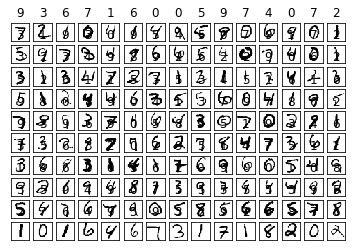

In [26]:
f1 = plt.figure(1)

for i in range(150):
    label       = totaldata[i][1]
    im_vector   = datas[i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()


# plot the average image of all the images for each digit

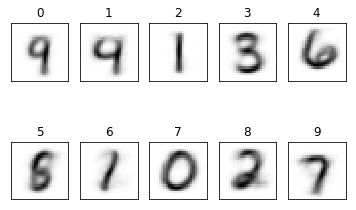

In [46]:
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title(i)

    im_average[:, i] += centroids[i]
    plt.imshow(im_average[:, i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()